In [1]:
#Name: Valerie Hernandez
#Student ID: 2956556
#Table Number: 3
#Table Members: Alexis Ng, Alice Kuang, Eva Morrison, Brooke Jackson
#Assignment Name: Worksheet 11 - Statistical Inference

In [3]:
install.packages('infer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘patchwork’




In [5]:
install.packages('cowplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('tests.R')
#source('cleanup.R')


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




In [9]:
#Question 1.0
answer1.0 <- "B"
test_1.0()

Test passed 🥇
[1] "Success!"


In [11]:
#Question 1.1
point_estimate <- 6
population <- 1
random_sampling <- 2
representative_sampling <- 7
population_parameter <- 3
sample <- 5
observation <- 8
sampling_distribution <- 4

test_1.1()

Test passed 😸
Test passed 🌈
[1] "Success!"


In [12]:
# run this cell to simulate a finite population
set.seed(4321) # DO NOT CHANGE
can_seniors <- tibble(age = (rexp(2000000, rate = 0.1)^2) + 65) %>% 
    filter(age <= 117, age >= 65)
can_seniors

age
<dbl>
65.09234
92.77292
90.08786
⋮
110.89105
65.00454
108.33006


Warning message in geom_histogram(bindwidth = 1):
“Ignoring unknown parameters: `bindwidth`”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


Test passed 😀
Test passed 😀
Test passed 🥳
Test passed 😸
[1] "Success!"


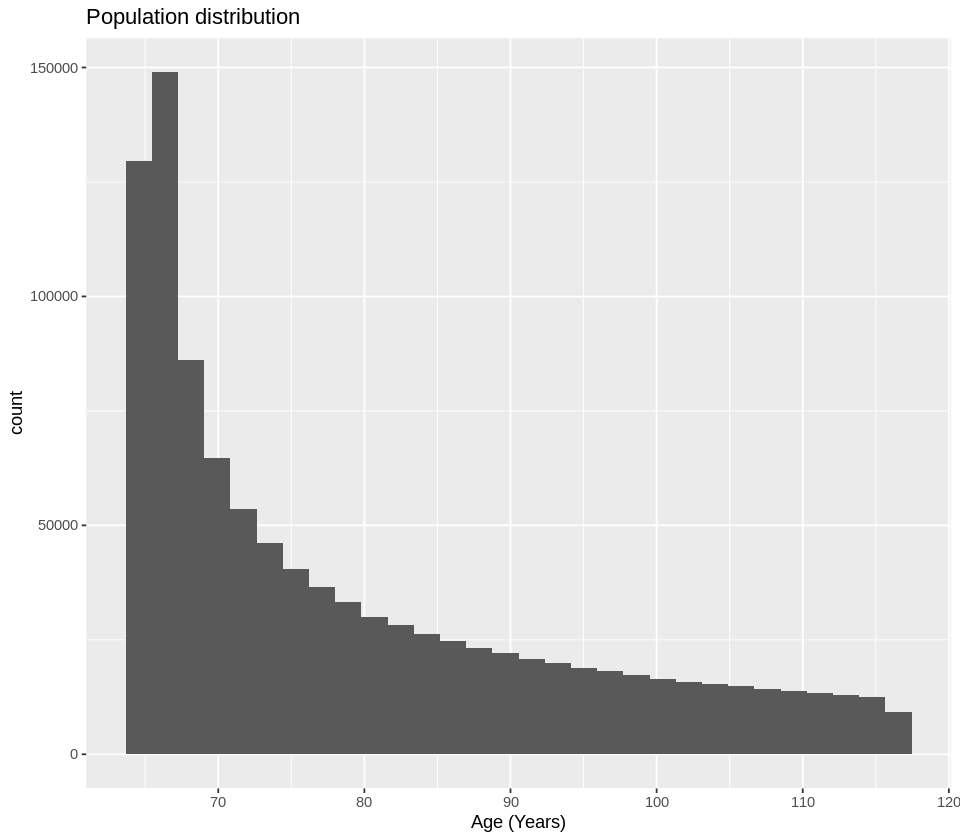

In [13]:
#Question 1.2
options(repr.plot.width = 8, repr.plot.height = 7)
pop_dist <- ggplot(can_seniors,aes(x=age) ) + 
    geom_histogram(bindwidth = 1) +
    labs(x = "Age (Years)")+
    ggtitle("Population distribution")

pop_dist
test_1.2()

In [14]:
#Question 1.3
pop_parameters <- can_seniors %>% 
  summarize(pop_mean = mean(age),
            pop_med = median(age),
            pop_sd = sd(age))

pop_parameters
test_1.3()

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
79.30102,73.80002,14.61612


Test passed 🌈
[1] "Success!"


In [15]:
#Question 1.4
set.seed(4321) # DO NOT CHANGE!
sample_1 <- can_seniors %>% 
    rep_sample_n(40)

sample_1
test_1.4()

replicate,age
<int>,<dbl>
1,70.68021
1,99.73999
1,66.98616
⋮,⋮
1,65.04367
1,70.40646
1,66.75226


Test passed 🥇
Test passed 😸
[1] "Success!"


Test passed 🎊
Test passed 😀
Test passed 🎊
Test passed 😀
[1] "Success!"


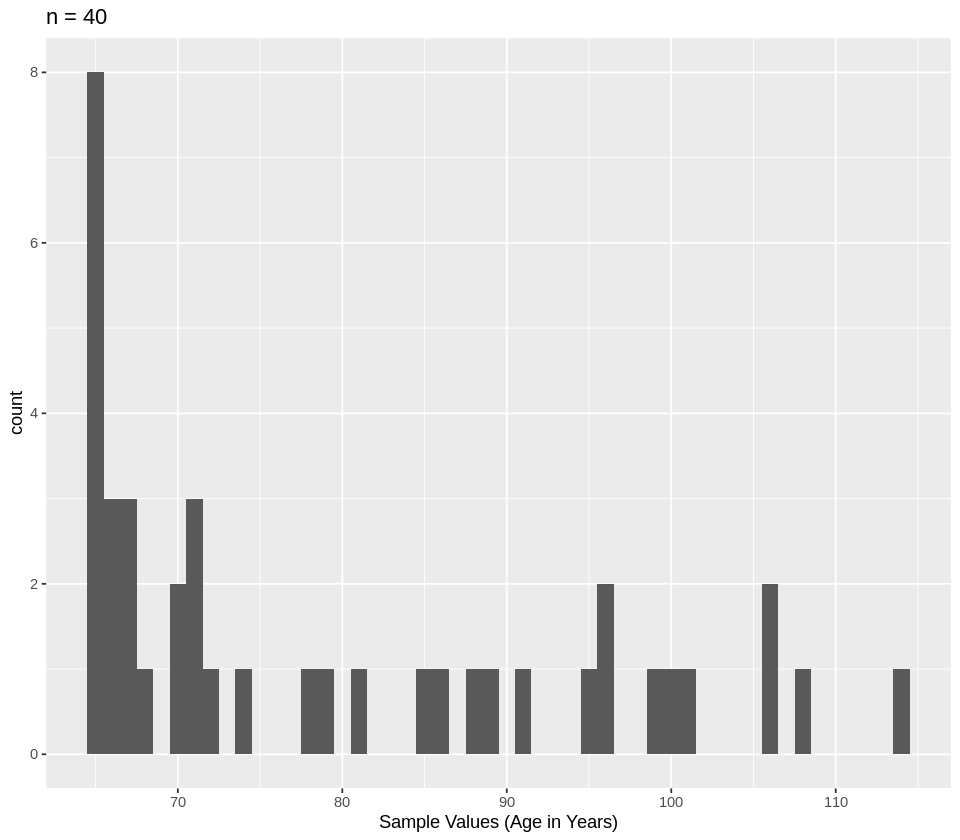

In [73]:
#Question 1.5
options(repr.plot.width = 8, repr.plot.height = 7)
sample_1_dist <- ggplot(sample_1, aes(x=age) )+
  geom_histogram(binwidth = 1) +
  labs(x="Sample Values (Age in Years)") +
  ggtitle("n = 40")

sample_1_dist
test_1.5()

In [22]:
#Question 1.6
sample_1_estimates <- sample_1 %>%
  summarize(sample_1_mean = mean(age),
            sample_1_med = median(age),
            sample_1_sd = sd(age))

sample_1_estimates
test_1.6()

replicate,sample_1_mean,sample_1_med,sample_1_sd
<int>,<dbl>,<dbl>,<dbl>
1,79.63442,71.63091,15.34286


Test passed 😸
Test passed 😸
[1] "Success!"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


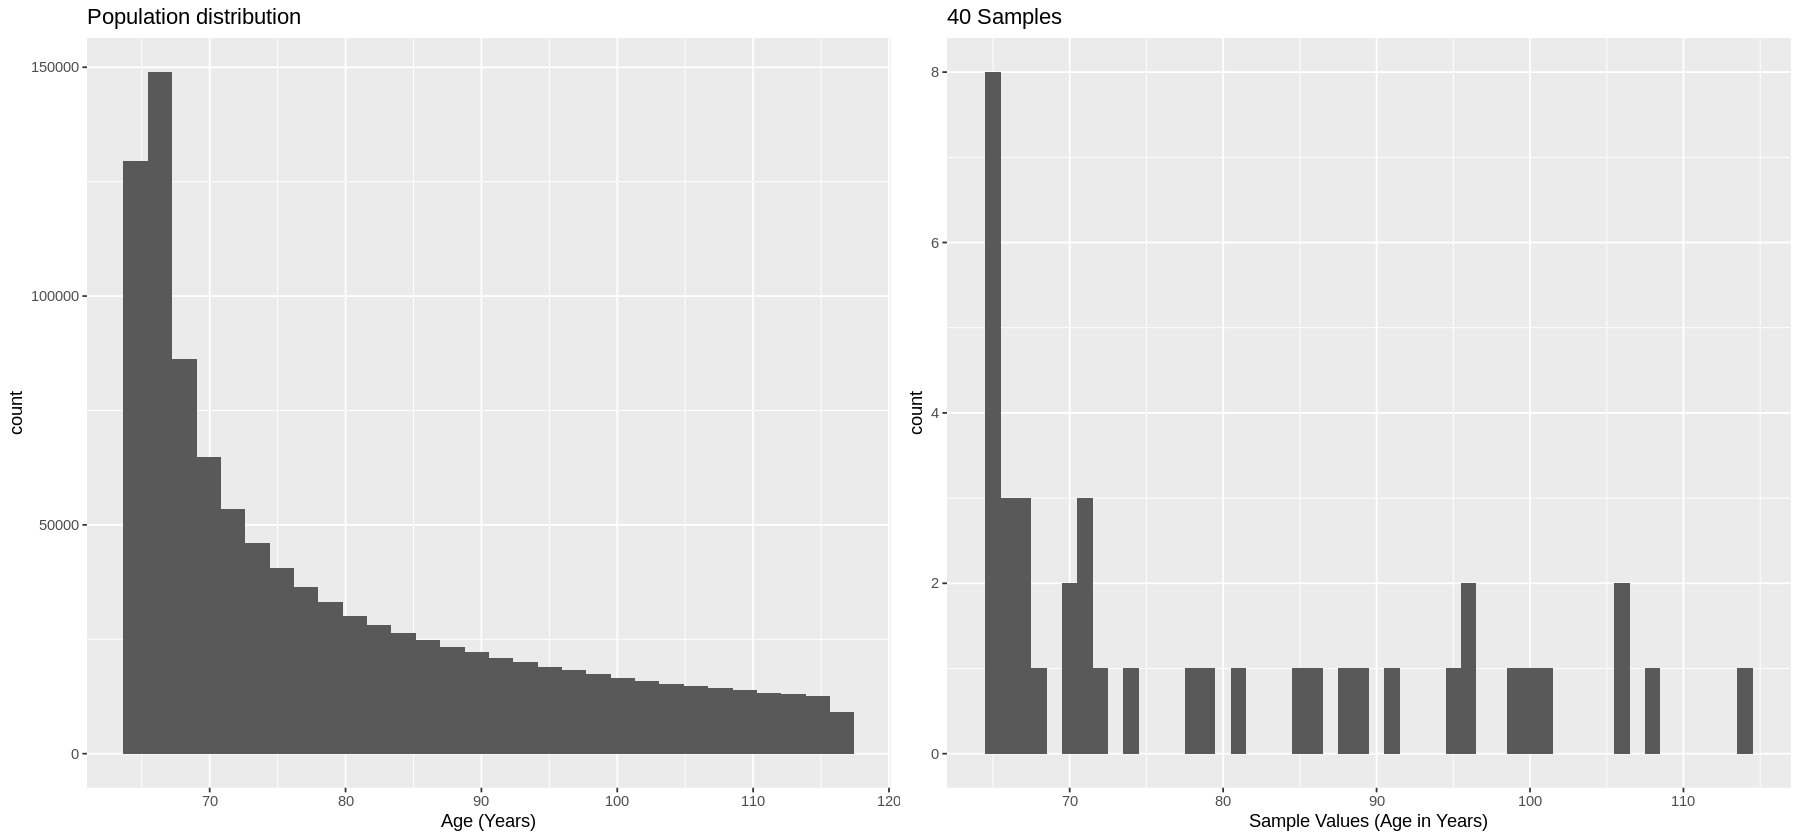

In [23]:
# run this code cell
options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(pop_dist, sample_1_dist, ncol = 2)

In [24]:
# run this cell
pop_parameters
sample_1_estimates %>% select(-replicate)

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
79.30102,73.80002,14.61612


sample_1_mean,sample_1_med,sample_1_sd
<dbl>,<dbl>,<dbl>
79.63442,71.63091,15.34286


In [27]:
#Question 1.7
answer1.7 <- "C"
test_1.7()

Test passed 🌈
[1] "Success!"


Warning message in geom_histogram(binwdith = 1):
“Ignoring unknown parameters: `binwdith`”


replicate,age
<int>,<dbl>
1,79.78909
1,74.78351
1,65.10430
⋮,⋮
1,65.02995
1,85.61552
1,71.70956


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


replicate,sample_2_mean,sample_2_med,sample_2_sd
<int>,<dbl>,<dbl>,<dbl>
1,76.69401,71.34158,13.56326


Test passed 🥇
Test passed 🥇
Test passed 🥳
Test passed 🥇
Test passed 🎉
Test passed 🌈
Test passed 😸
Test passed 🎉
[1] "Success!"


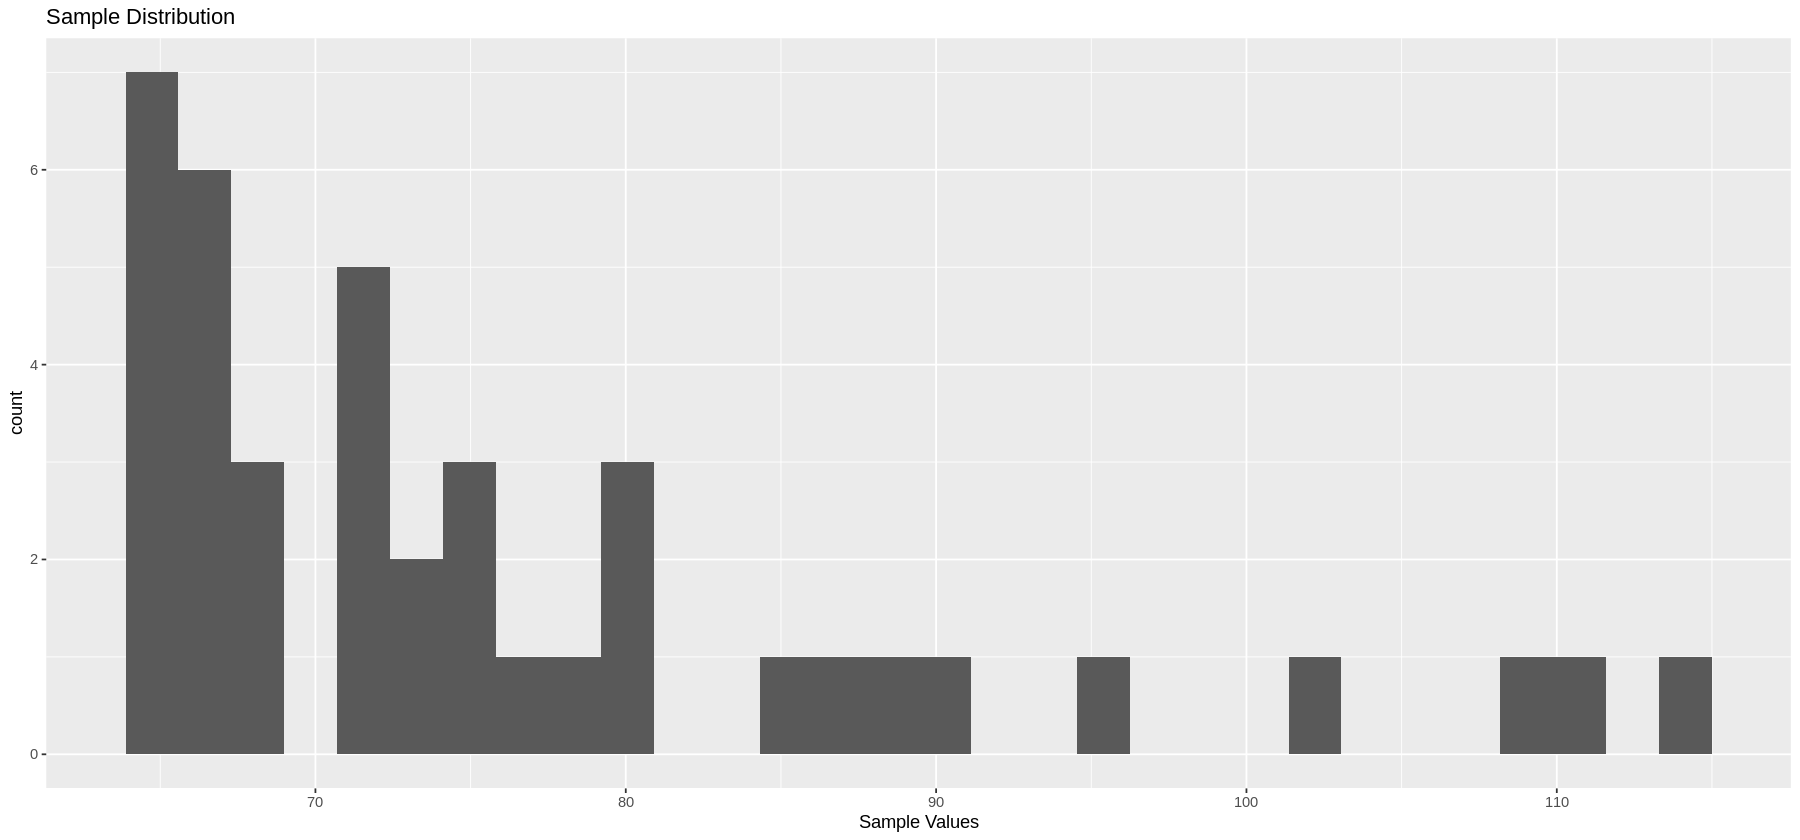

In [29]:
#Question 1.8.0
set.seed(2020) # DO NOT CHANGE!
#take another sample
sample_2 <- can_seniors %>% 
    rep_sample_n(40)

#visualize distribution
sample_2_dist <- ggplot(sample_2, aes(x=age)) +
  geom_histogram(binwdith = 1) +
  labs(x = "Sample Values") +
  ggtitle("Sample Distribution")

#Estimates
sample_2_estimates <- sample_2 %>%
  summarize(sample_2_mean = mean(age),
            sample_2_med = median(age),
            sample_2_sd = sd(age))

sample_2
sample_2_dist
sample_2_estimates
test_1.8.0()

In [31]:
#Question 1.8.1
answer1.8.1 <- "C"
test_1.8.1()

Test passed 🎊
[1] "Success!"


In [32]:
#Question 1.9
samples <- rep_sample_n(can_seniors, size = 40, reps = 1500)
set.seed(4321) # DO NOT CHANGE!

head(samples)
tail(samples)
dim(samples)

test_1.9()

replicate,age
<int>,<dbl>
1,91.21302
1,68.09849
1,69.29469
1,111.55358
1,65.10083
1,65.06577


replicate,age
<int>,<dbl>
1500,65.08766
1500,65.40681
1500,65.09645
1500,101.38802
1500,68.40132
1500,102.89903


[1] 60000     2

Test passed 🥇
Test passed 🎉
[1] "Success!"


In [90]:
#Question 2.0
sample_estimates <- samples %>%
  group_by(replicate) %>%
  summarize(sample_mean = mean(age))

head(sample_estimates)
tail(sample_estimates)

test_2.0()

replicate,sample_mean
<int>,<dbl>
1,78.66462
2,81.95959
3,77.08440
4,78.96375
5,80.24870
6,80.24210


replicate,sample_mean
<int>,<dbl>
1495,81.70243
1496,81.26838
1497,78.54240
1498,80.25114
1499,77.45325
1500,80.30329


Test passed 🥳
Test passed 🎊
[1] "Success!"


Test passed 🥇
Test passed 😀
── Failure (???): sampling_distribution data should be used to create the histogram ──
digest(...) not equal to "e20a3a6689ccb7122ce8aaa71bab55bf".
1/1 mismatches
x[1]: "0e00f7edc851ed973efa02f2b10bfecc"
y[1]: "e20a3a6689ccb7122ce8aaa71bab55bf"



ERROR: ignored

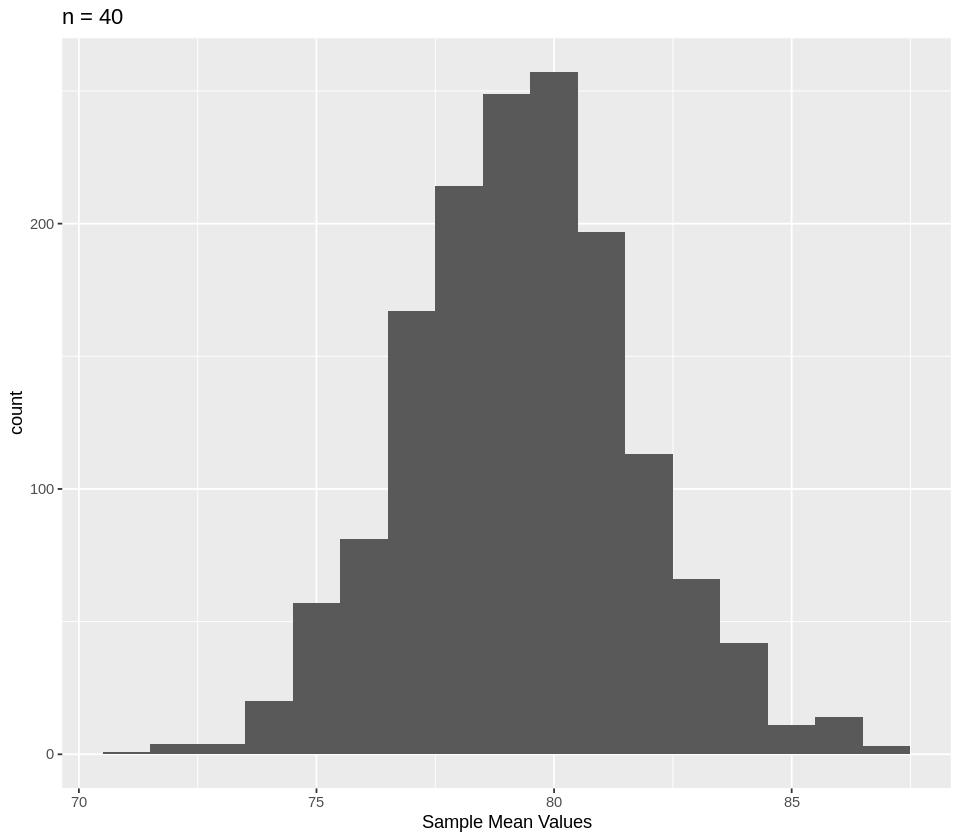

In [93]:
#Question 2.1
options(repr.plot.width = 8, repr.plot.height = 7)
#Visualize the distribution of the sample estimates (sample_estimates) you just calculated by 
#plotting a histogram using binwidth = 1 in the geom_histogram argument. 
#Name the plot sampling_distribution and give the plot title (using ggtitle) and the x-axis a descriptive label.

sampling_distribution <- ggplot(data = sample_estimates, aes(x = sample_mean)) +
  geom_histogram(binwidth = 1) +
  labs(x="Sample Mean Values") +
  ggtitle("n = 40")

#Getting an error I don't understand

sampling_distribution
test_2.1()

In [87]:
#Question 2.2
answer2.2 <- 79.30
test_2.2()

Test passed 🎊
[1] "Success!"


In [50]:
#Question 2.3
answer2.3 <- "B"
test_2.3()

Test passed 🥳
[1] "Success!"


In [51]:
#Question 2.4
answer2.4 <- "true"
test_2.4()

Test passed 🌈
[1] "Success!"


Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


Test passed 🥇
Test passed 🎉
Test passed 😀
Test passed 🎊
[1] "Success!"


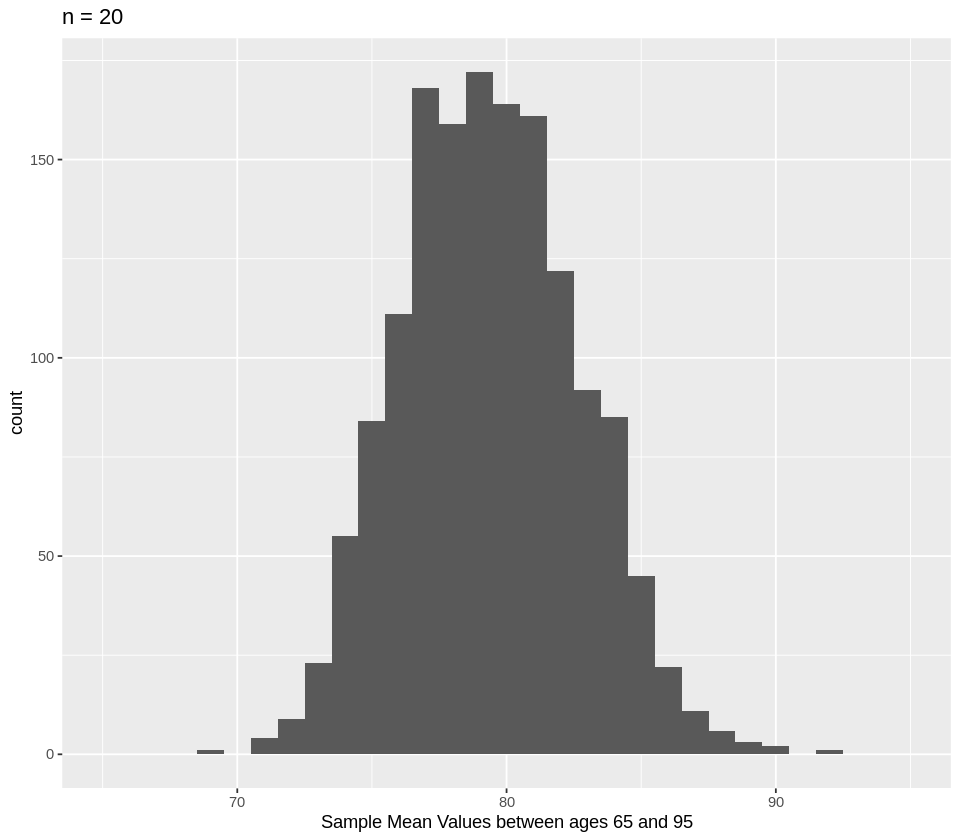

In [79]:
#Question 2.5
set.seed(4321) # DO NOT CHANGE THIS!
options(repr.plot.width = 8, repr.plot.height = 7)

#Take samples
sample_20 <- rep_sample_n(can_seniors, size = 20, reps = 1500)

#mean age
sample_20_mean <- sample_20 %>%
  summarize(sample_mean = mean(age))

#visualize
sampling_distribution_20 <- ggplot(sample_20_mean, aes(x=sample_mean)) +
                            geom_histogram(binwidth = 1) +
                            labs(x="Sample Mean Values between ages 65 and 95") +
                            ggtitle("n = 20") +
                            xlim(c(65, 95))

sampling_distribution_20
test_2.5()

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


Test passed 🥳
Test passed 🎉
Test passed 🥇
Test passed 😀
[1] "Success!"


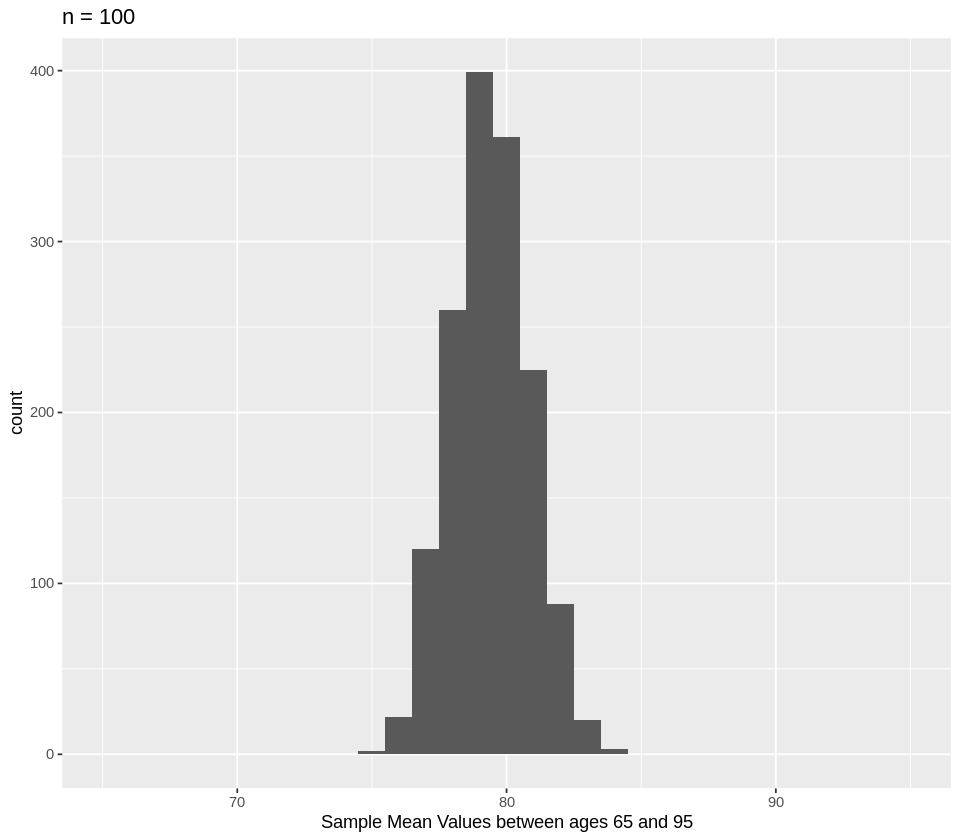

In [68]:
#Question 2.6
set.seed(4321) # DO NOT CHANGE THIS!
options(repr.plot.width = 8, repr.plot.height = 7)

#Take samples
sample_100 <- rep_sample_n(can_seniors, size = 100, reps = 1500)

#mean age
sample_100_mean <- sample_100 %>%
  summarize(sample_mean = mean(age))

#visualize
sampling_distribution_100 <- ggplot(sample_100_mean, aes(x=sample_mean)) +
                            geom_histogram(binwidth = 1) +
                            labs(x="Sample Mean Values between ages 65 and 95") +
                            ggtitle("n = 100") +
                            xlim(c(65, 95))

sampling_distribution_100
test_2.6()

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


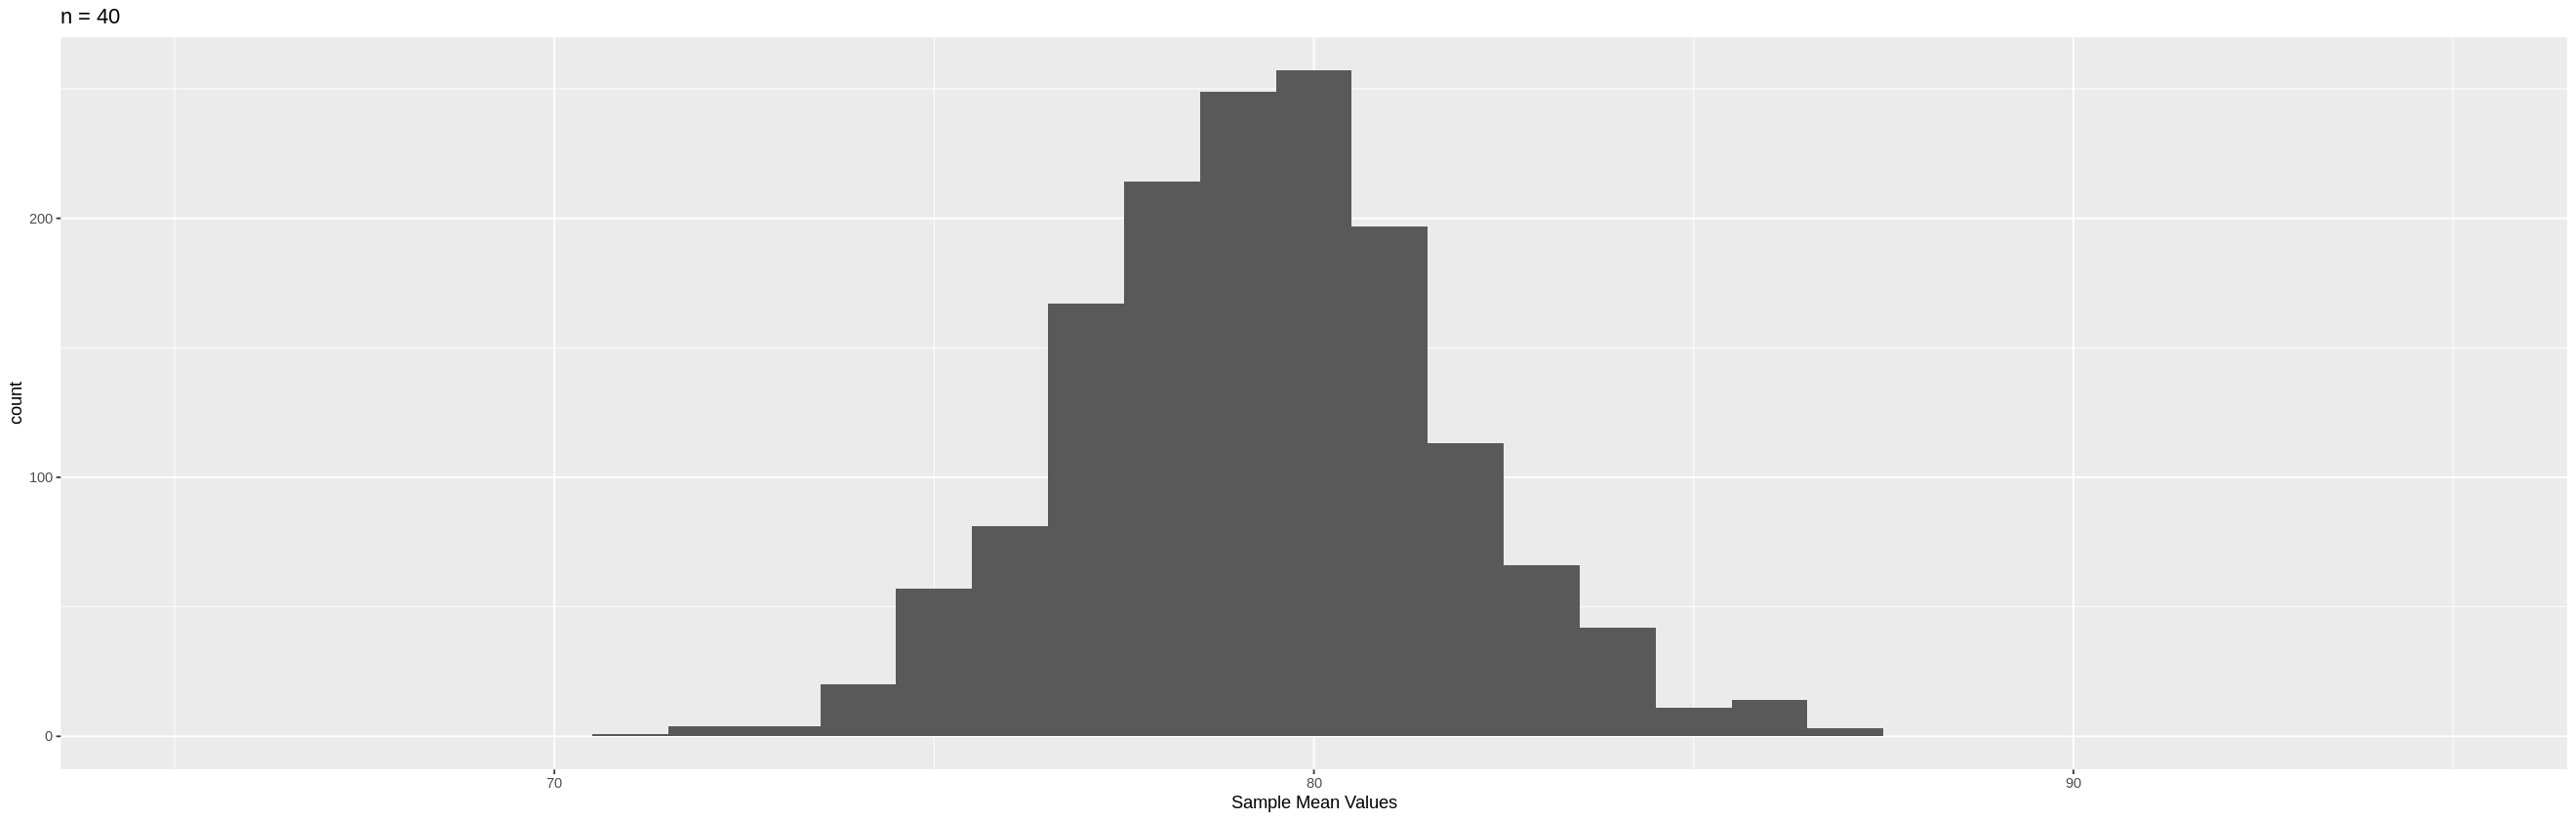

In [77]:
# run this cell to change the sampling distribution plot created
# earlier in the notebook so that the x-axis is the same dimensions
# as the other two plots you just made, and so that the title is "n = 40"
sampling_distribution <- sampling_distribution + 
    xlim(c(65, 95))
sampling_distributionlabeltitle <- "n = 40"

sampling_distribution

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


Test passed 🎊
Test passed 😸
[1] "Success!"


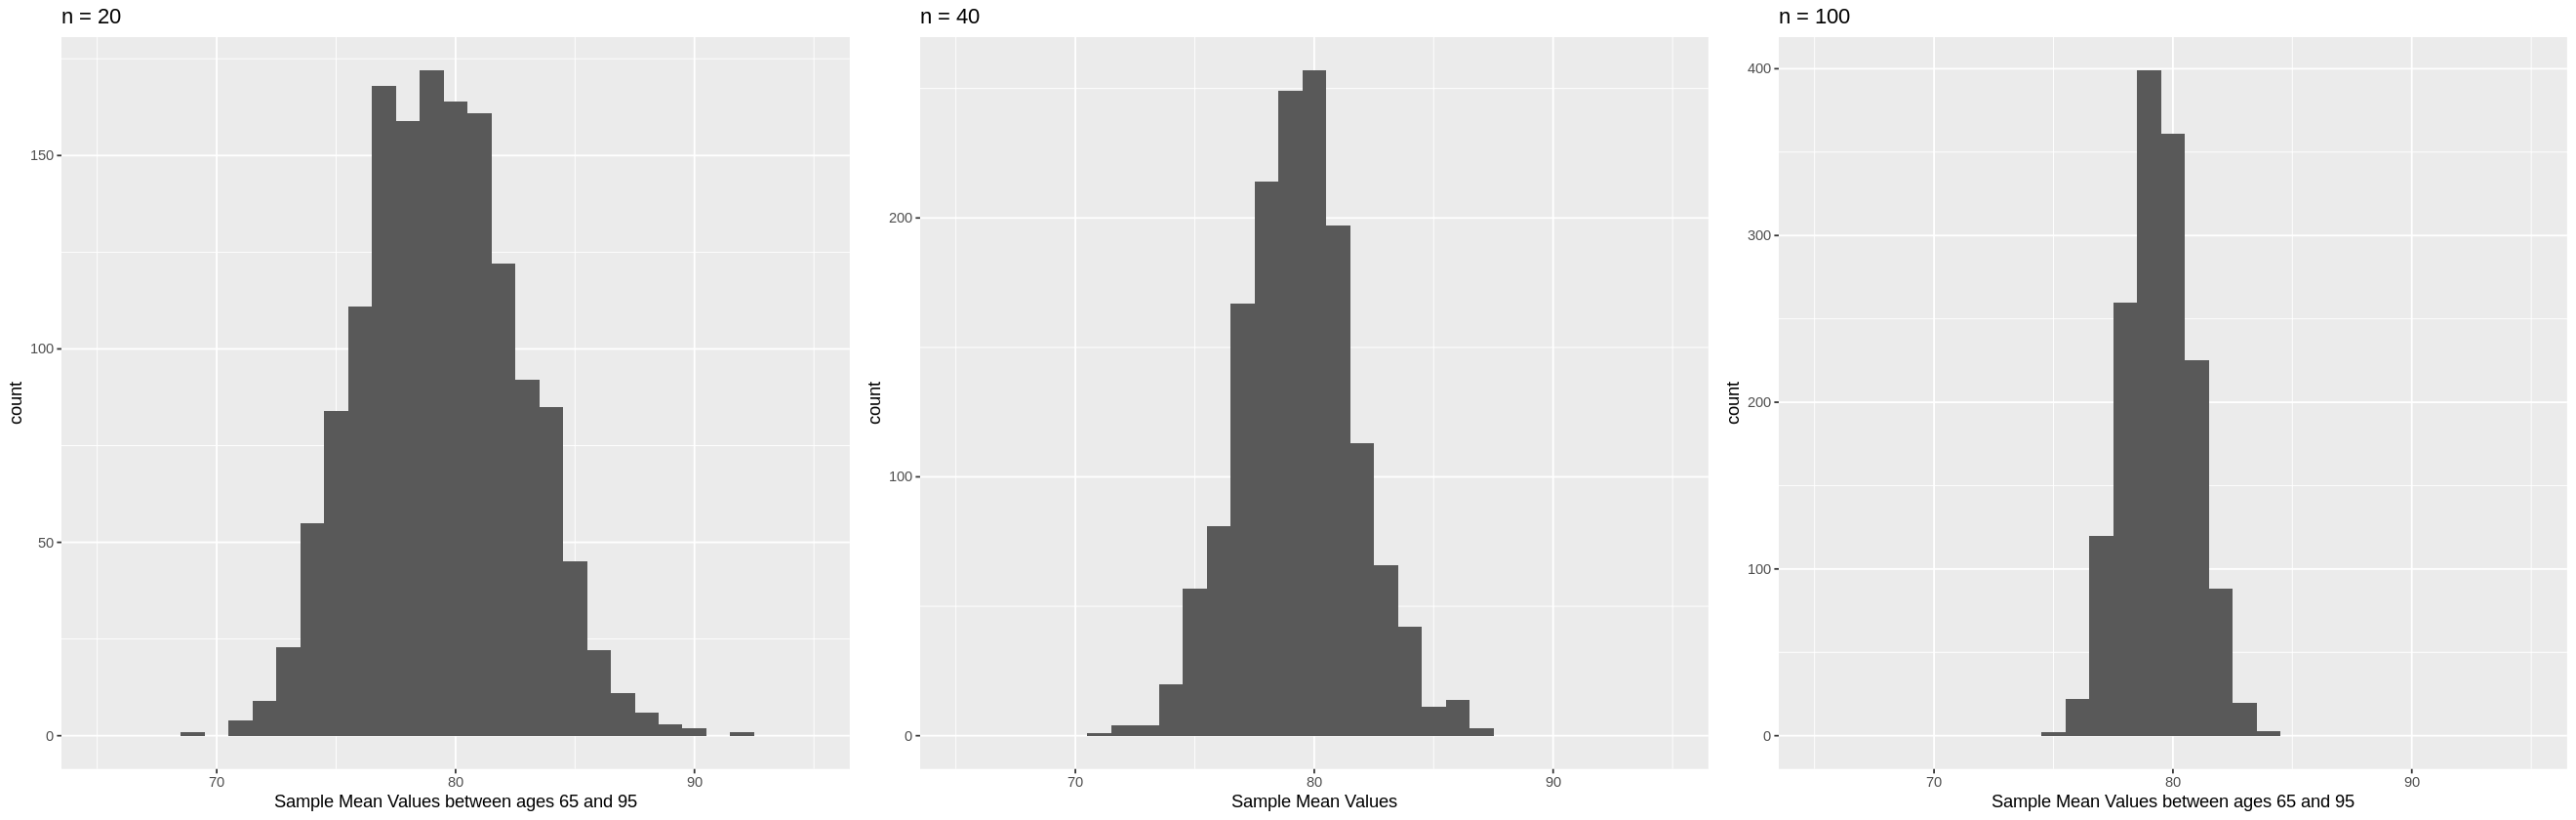

In [80]:
#Question 2.7
options(repr.plot.width = 22)
sampling_distribution_panel <- plot_grid(sampling_distribution_20,
                   sampling_distribution,
                   sampling_distribution_100,
                   ncol = 3)

sampling_distribution_panel

test_2.7()

In [81]:
#Question 2.8
answer2.8 <- "D"
test_2.8()

Test passed 🥳
[1] "Success!"


In [83]:
#Question 2.9
answer2.9 <- "false"
test_2.9()

Test passed 🥇
[1] "Success!"


In [ ]:
#source('cleanup.R')